In [237]:
# Packages for Numeric + Dataframe
import pandas as pd
import numpy as np

# Packegs for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages For Datetime
from datetime import datetime
from datetime import date
from datetime import timedelta

# Packages for OLS , MLR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
import sklearn.metrics as metrics

In [124]:
# Loading Dataset
taxi0 = pd.read_csv(r"C:\Users\Aman Shah\Desktop\Google Advance Data Analytics\05 Regression\Project\P-1 AutometiData\Autometi Data\work\2017_Yellow_Taxi_Trip_Data.csv")


In [125]:
taxi = taxi0.copy()

print("Shape of Dataset : " , taxi.shape)
print("Shape of Dataset After Droping Duplicates : " , taxi.drop_duplicates().shape)

print("Missing Values Count : " , taxi.isna().sum().sum())
print("Missing Values Column wise")
taxi.isna().sum()

Shape of Dataset :  (22699, 18)
Shape of Dataset After Droping Duplicates :  (22699, 18)
Missing Values Count :  0
Missing Values Column wise


Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [126]:
print(taxi.info())
taxi.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [127]:
taxi.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [128]:
taxi["tpep_pickup_datetime"][0] 

'03/25/2017 8:55:43 AM'

In [129]:
print("Data Type of tpep_pickup_datetime : ", taxi["tpep_pickup_datetime"].dtype) 
print("Data Type of tpep_dropoff_datetime : ", taxi["tpep_dropoff_datetime"].dtype) 

taxi['tpep_pickup_datetime'] = pd.to_datetime(taxi['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')
taxi["tpep_dropoff_datetime"] = pd.to_datetime(taxi["tpep_dropoff_datetime"] , format = "%m/%d/%Y %I:%M:%S %p" )

print("Data Type of tpep_pickup_datetime : ", taxi["tpep_pickup_datetime"].dtype) 
print("Data Type of tpep_dropoff_datetime : ", taxi["tpep_dropoff_datetime"].dtype) 

taxi.head(3)

Data Type of tpep_pickup_datetime :  object
Data Type of tpep_dropoff_datetime :  object
Data Type of tpep_pickup_datetime :  datetime64[ns]
Data Type of tpep_dropoff_datetime :  datetime64[ns]


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75


In [130]:
taxi["duration"] = (taxi["tpep_dropoff_datetime"] - taxi["tpep_pickup_datetime"]) / np.timedelta64(1, 'm')

In [131]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

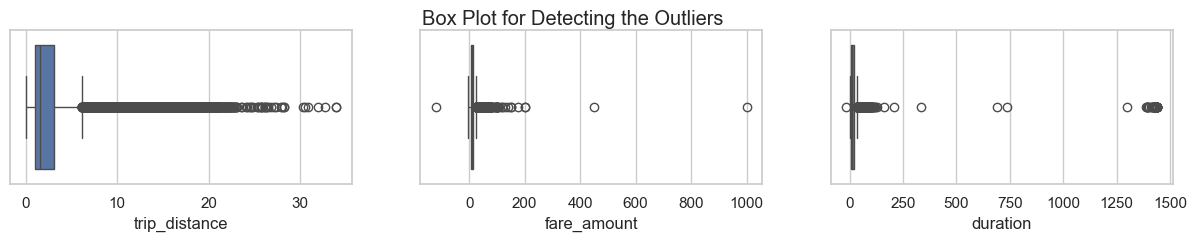

In [132]:
fig , axes = plt.subplots(1,3 , figsize=(15,2))
fig.suptitle("Box Plot for Detecting the Outliers")
sns.boxplot(ax=axes[0] , x = taxi["trip_distance"])
sns.boxplot(ax=axes[1] , x = taxi["fare_amount"])
sns.boxplot(ax=axes[2] , x = taxi["duration"])
plt.show()

In [133]:
sorted(set(taxi["trip_distance"]))[:10]

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

In [134]:
sum(taxi["trip_distance"]==0)

148

In [135]:
taxi["fare_amount"].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

In [136]:
taxi.loc[taxi["fare_amount"] < 0 , "fare_amount"] = 0
print(taxi["fare_amount"].min())

0.0


In [137]:
def outlier_imputer(column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    for col in column_list:
        # Reassign minimum to zero
        taxi.loc[taxi[col] < 0, col] = 0

        # Calculate upper threshold
        q1 = taxi[col].quantile(0.25)
        q3 = taxi[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)

        # Reassign values > threshold to threshold
        taxi.loc[taxi[col] > upper_threshold, col] = upper_threshold
        print(taxi[col].describe())
        print()

In [138]:
outlier_imputer(["fare_amount"] , 6)

fare_amount
q3: 14.5
upper_threshold: 62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64



In [139]:
taxi["duration"].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

In [140]:
taxi.loc[taxi["duration"] < 0 , "duration"] = 0
print(taxi["duration"].min())

0.0


In [141]:
outlier_imputer(["duration"] , 6)

duration
q3: 18.383333333333333
upper_threshold: 88.78333333333333
count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64



In [142]:
taxi["pickup_dropoff"] = taxi["PULocationID"].astype(str) + " " + taxi["DOLocationID"].astype(str)
taxi["pickup_dropoff"].head()

0    100 231
1     186 43
2    262 236
3     188 97
4      4 112
Name: pickup_dropoff, dtype: object

In [164]:
grouped = taxi.groupby('pickup_dropoff').mean(numeric_only=True)[['duration']]
grouped

# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict['duration']

taxi['mean_duration'] = taxi['pickup_dropoff']
taxi['mean_duration'] = taxi['mean_duration'].map(grouped_dict)

# Confirm that it worked
taxi[(taxi['PULocationID']==100) & (taxi['DOLocationID']==231)][['mean_duration']]

,mean_duration
0,22.847222
4909,22.847222
16636,22.847222
18134,22.847222
19761,22.847222
20581,22.847222


In [207]:
taxi["day"] = taxi["tpep_pickup_datetime"].dt.day_name().str.lower()

taxi["month"] = taxi["tpep_pickup_datetime"].dt.strftime("%b").str.lower()

In [208]:
# Create 'rush_hour' col
taxi['rush_hour'] = taxi['tpep_pickup_datetime'].dt.hour

# If day is Saturday or Sunday, impute 0 in `rush_hour` column
taxi.loc[taxi['day'].isin(['saturday', 'sunday']), 'rush_hour'] = 0

In [209]:
def rush_hourizer(hour):
    if 6 <= hour['rush_hour'] < 10:
        val = 1
    elif 16 <= hour['rush_hour'] < 20:
        val = 1
    else:
        val = 0
    return val

In [210]:
taxi.loc[(taxi.day != 'saturday') & (taxi.day != 'sunday'), 'rush_hour'] = \
    taxi.apply(rush_hourizer, axis=1).astype('int64')
taxi.head()

C:\Users\Aman Shah\AppData\Local\Temp\ipykernel_10532\1311099299.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0 1 1 ... 1 0 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  taxi.loc[(taxi.day != 'saturday') & (taxi.day != 'sunday'), 'rush_hour'] = \


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,day,month,rush_hour,mean_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,100 231,3.521667,saturday,mar,0,22.847222
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,186 43,3.108889,tuesday,apr,0,24.470370
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,262 236,0.881429,friday,dec,1,7.250000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,188 97,3.700000,sunday,may,0,30.250000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,4 112,4.435000,saturday,apr,0,14.616667


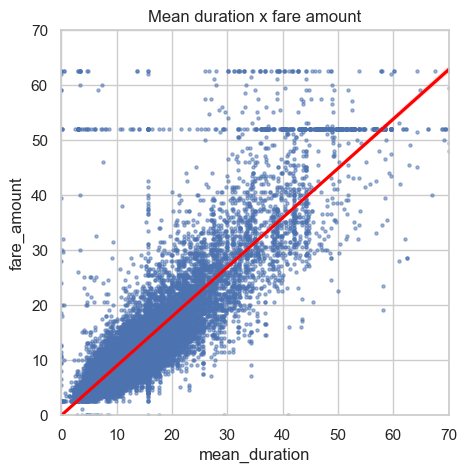

In [211]:
# Create a scatter plot of duration and trip_distance, with a line of best fit
sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.regplot(x=taxi['mean_duration'], y=taxi['fare_amount'],
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'})
plt.ylim(0, 70)
plt.xlim(0, 70)
plt.title('Mean duration x fare amount')
plt.show()

In [212]:
taxi[taxi["fare_amount"] > 50]["fare_amount"].value_counts().head()

fare_amount
52.0    514
62.5     84
59.0      9
50.5      9
57.5      8
Name: count, dtype: int64

In [213]:
pd.set_option("display.max_column" , None)
taxi[taxi["fare_amount"] == 52].head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,day,month,rush_hour,mean_duration
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,36.800000,236 132,19.211667,sunday,mar,0,40.500000
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,66.850000,132 163,19.229000,saturday,jun,0,52.941667
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0.966667,132 132,2.255862,saturday,nov,0,3.021839
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,29.183333,132 79,19.431667,wednesday,dec,0,47.275000
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,29.483333,132 234,17.654000,sunday,sep,0,49.833333
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,39.833333,132 48,18.761905,tuesday,feb,1,58.246032
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,15.616667,228 88,4.730000,monday,jun,0,15.616667
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,45.450000,132 48,18.761905,thursday,aug,0,58.246032
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,42.850000,186 132,17.096000,tuesday,sep,0,42.920000
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,71.583333,132 148,17.994286,sunday,apr,0,46.340476


In [214]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [215]:
taxi2 = taxi.copy()

taxi2 =taxi2.drop(['Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
               'pickup_dropoff', 'day', 'month'
               ], axis=1)

taxi2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   rush_hour        22699 non-null  int64  
 5   mean_duration    22699 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


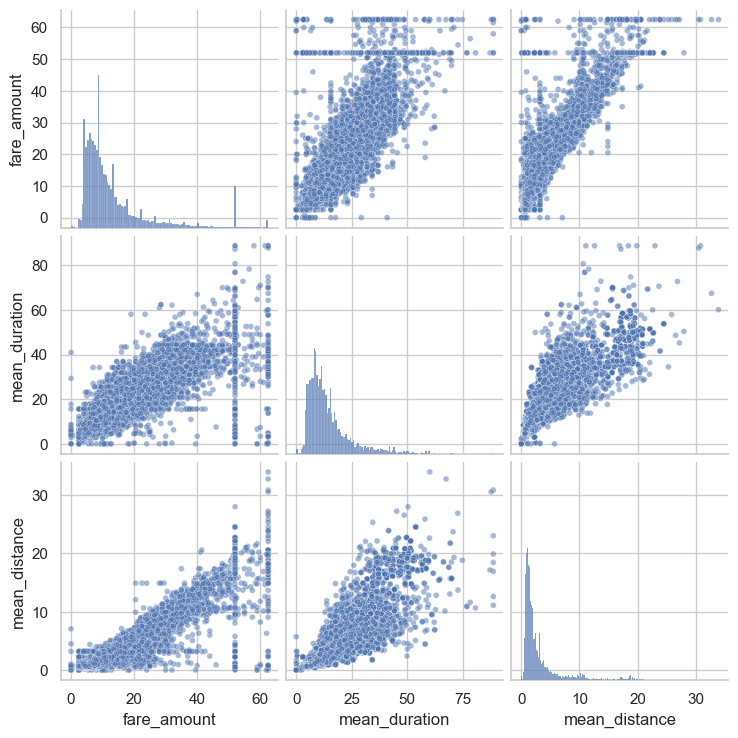

In [216]:
sns.pairplot(taxi2[["fare_amount" , "mean_duration" ,"mean_distance" ,]],
            plot_kws = ({"alpha" : 0.5 , "size":5})
            )

In [218]:
taxi2.corr(method='pearson')

,VendorID,passenger_count,fare_amount,mean_distance,rush_hour,mean_duration
VendorID,1.000000,0.266463,0.001045,0.004741,-0.002874,0.001876
passenger_count,0.266463,1.000000,0.014942,0.013428,-0.022035,0.015852
fare_amount,0.001045,0.014942,1.000000,0.910185,-0.020075,0.859105
mean_distance,0.004741,0.013428,0.910185,1.000000,-0.039725,0.874864
rush_hour,-0.002874,-0.022035,-0.020075,-0.039725,1.000000,-0.021583
mean_duration,0.001876,0.015852,0.859105,0.874864,-0.021583,1.000000


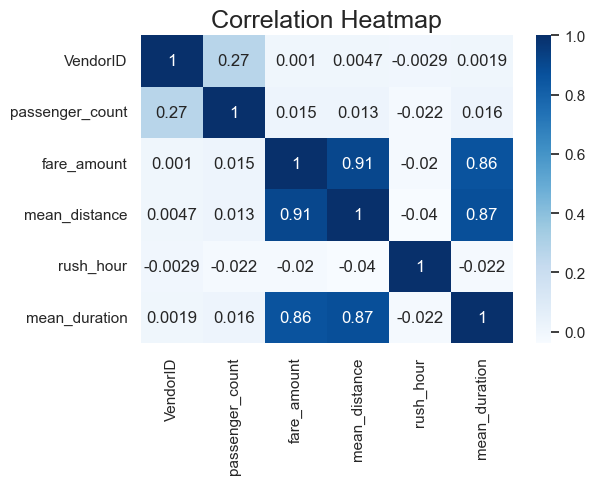

In [222]:
plt.figure(figsize=(6,4))
sns.heatmap(taxi2.corr(method="pearson"),
            annot=True ,cmap="Blues"
           )
plt.title("Correlation Heatmap" , 
          fontsize = 18)
plt.show()

In [228]:
X = taxi2.drop(columns=["fare_amount"])

y = taxi2[["fare_amount"]]

X.head()

,VendorID,passenger_count,mean_distance,rush_hour,mean_duration
0,2,6,3.521667,0,22.847222
1,1,1,3.108889,0,24.470370
2,1,1,0.881429,1,7.250000
3,2,1,3.700000,0,30.250000
4,2,1,4.435000,0,14.616667


In [229]:
# Convert VendorID to string
X['VendorID'] = X['VendorID'].astype(str)

# Get dummies
X = pd.get_dummies(X, drop_first=True)
X.head()

,passenger_count,mean_distance,rush_hour,mean_duration,VendorID_2
0,6,3.521667,0,22.847222,True
1,1,3.108889,0,24.470370,False
2,1,0.881429,1,7.250000,False
3,1,3.700000,0,30.250000,True
4,1,4.435000,0,14.616667,True


In [231]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.2 , random_state = 0)

In [242]:
Scaler = StandardScaler().fit(X_train)

In [241]:
X_train_scaled = Scaler.transform(X_train)
print("X_train_Scaled " , X_train_scaled )

X_train_Scaled  [[-0.50301524  0.8694684  -0.64893329  0.17616665  0.89286563]
 [-0.50301524 -0.60011281  1.54099045 -0.69829589  0.89286563]
 [ 0.27331093 -0.47829156 -0.64893329 -0.57301906 -1.11998936]
 ...
 [-0.50301524 -0.45121122 -0.64893329 -0.6788917  -1.11998936]
 [-0.50301524 -0.58944763  1.54099045 -0.85743597 -1.11998936]
 [ 1.82596329  0.83673851 -0.64893329  1.13212101  0.89286563]]


In [235]:
lr = LinearRegression()
model = lr.fit(X_train_scaled , y_train)

In [240]:
r_sq = lr.score(X_train_scaled , y_train)
print('Coefficient of determination:', r_sq)

y_pred_train = lr.predict(X_train_scaled)

print(f"R^2 Score : " , metrics.r2_score(y_train , y_pred_train))
print(f"Mean Absolute Error : " , metrics.mean_absolute_error(y_train , y_pred_train))
print(f"Mean Squared Error : " , metrics.mean_squared_error(y_train , y_pred_train))
print(f"Root Mean Squared Error : " , np.sqrt(metrics.mean_squared_error(y_train , y_pred_train)))

Coefficient of determination: 0.8398434585044773
R^2 Score :  0.8398434585044773
Mean Absolute Error :  2.186666416775413
Mean Squared Error :  17.88973296349268
Root Mean Squared Error :  4.229625629236313


In [243]:
X_test_scaled = Scaler.transform(X_test)
print("X_train_Scaled " , X_test_scaled )

X_train_Scaled  [[-0.50301524 -0.01228033 -0.64893329 -0.1109662   0.89286563]
 [-0.50301524  0.1705781  -0.64893329  0.83266676  0.89286563]
 [ 0.27331093 -0.56800902 -0.64893329 -0.71163492  0.89286563]
 ...
 [-0.50301524 -0.5294519  -0.64893329 -0.64990563  0.89286563]
 [-0.50301524 -0.53660633 -0.64893329 -0.83261981 -1.11998936]
 [-0.50301524 -0.29519336  1.54099045 -0.17972406  0.89286563]]


In [244]:
r_sq_test = lr.score(X_test_scaled , y_test)
print('Coefficient of determination:', r_sq_test)

y_pred_test = lr.predict(X_test_scaled)

print(f"R^2 Score : " , metrics.r2_score(y_test , y_pred_test))
print(f"Mean Absolute Error : " , metrics.mean_absolute_error(y_test , y_pred_test))
print(f"Mean Squared Error : " , metrics.mean_squared_error(y_test , y_pred_test))
print(f"Root Mean Squared Error : " , np.sqrt(metrics.mean_squared_error(y_test , y_pred_test)))

Coefficient of determination: 0.8682583641795454
R^2 Score :  0.8682583641795454
Mean Absolute Error :  2.1336549840593855
Mean Squared Error :  14.32645415699894
Root Mean Squared Error :  3.7850302716093225


In [246]:
result = pd.DataFrame({"actual" : y_test["fare_amount"],
                      "predicted" : y_pred_test.ravel()
                      })

result["residuals"] =  result["actual"] - result["predicted"]

In [247]:
result.head()

,actual,predicted,residuals
5818,14.0,12.356503,1.643497
18134,28.0,16.314595,11.685405
4655,5.5,6.726789,-1.226789
7378,15.5,16.227206,-0.727206
13914,9.5,10.536408,-1.036408


Text(0.5, 1.0, 'Actual vs Predicted')

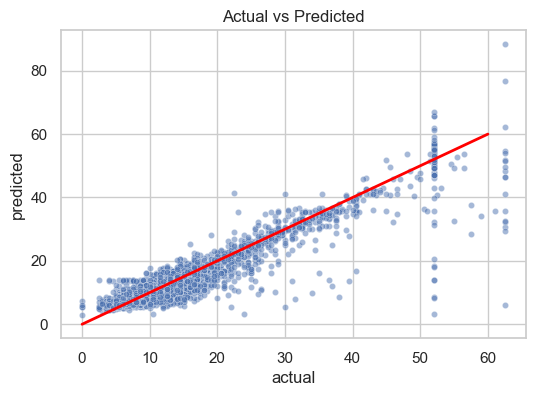

In [250]:
fig , axes = plt.subplots(figsize=(6,4))
sns.scatterplot(
    x="actual",
    y="predicted",
    data=result,
    alpha = 0.5,
    s = 20,
    axes = axes
)
plt.plot([0,60] , [0,60] , c = "red" , linewidth= 2)
plt.title("Actual vs Predicted")

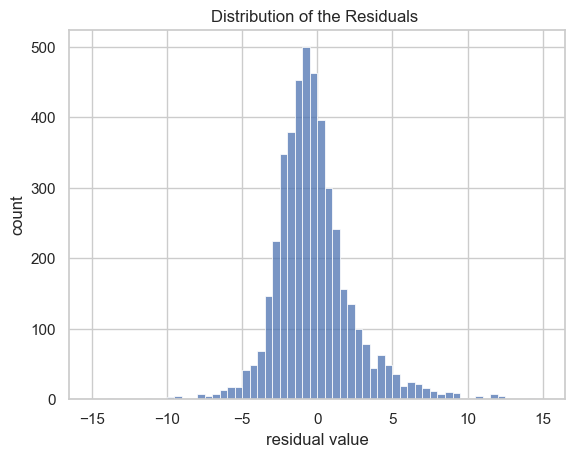

In [253]:
sns.histplot(result["residuals"] , bins = np.arange(-15,15.5,0.5))
plt.title("Distribution of the Residuals ")
plt.xlabel('residual value')
plt.ylabel('count');

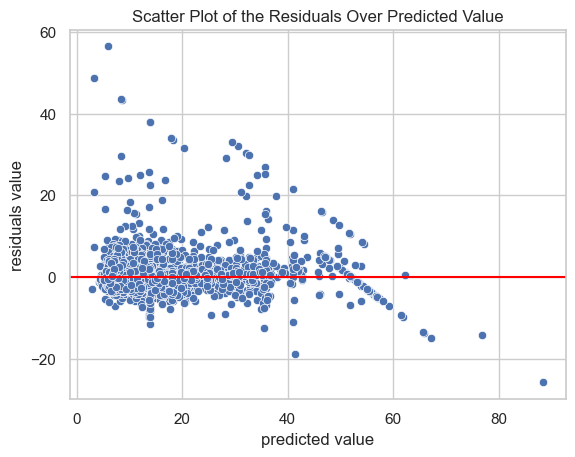

In [256]:
sns.scatterplot(
    x='predicted',
    y="residuals",
    data=result,
               )
plt.axhline(0 , color="red")
plt.title("Scatter Plot of the Residuals Over Predicted Value")
plt.xlabel("predicted value")
plt.ylabel("residuals value")
plt.show()

In [257]:
coefficient = pd.DataFrame(lr.coef_ , columns=X.columns)
coefficient.head()

,passenger_count,mean_distance,rush_hour,mean_duration,VendorID_2
0,0.030825,7.133867,0.110233,2.812115,-0.054373


In [258]:
# 1. Calculate SD of `mean_distance` in X_train data
print(X_train['mean_distance'].std())

# 2. Divide the model coefficient by the standard deviation
print(7.133867 / X_train['mean_distance'].std())

3.5748129752564366
1.9955916713344304


In [260]:
X_scaled = Scaler.transform(X)
y_preds_full = lr.predict(X_scaled)

In [262]:
# Create a new df containing just the RatecodeID col from the whole dataset
final_preds = taxi[['RatecodeID']].copy()

# Add a column containing all the predictions
final_preds['y_preds_full'] = y_preds_full

In [263]:
# Impute a prediction of 52 at all rows where RatecodeID == 2
final_preds.loc[final_preds['RatecodeID']==2, 'y_preds_full'] = 52

# Check that it worked
final_preds[final_preds['RatecodeID']==2].head()

,RatecodeID,y_preds_full
11,2,52.0
110,2,52.0
161,2,52.0
247,2,52.0
379,2,52.0


In [264]:
final_preds = final_preds['y_preds_full']
print('R^2:', r2_score(y, final_preds))
print('MAE:', mean_absolute_error(y, final_preds))
print('MSE:', mean_squared_error(y, final_preds))
print('RMSE:',np.sqrt(mean_squared_error(y, final_preds)))

R^2: 0.8910853978683976
MAE: 1.992506252269973
MSE: 12.10157550468993
RMSE: 3.4787318816905004


In [265]:
# Combine means columns with predictions column
nyc_preds_means = taxi[['mean_duration', 'mean_distance']].copy()
nyc_preds_means['predicted_fare'] = final_preds

nyc_preds_means.head()

,mean_duration,mean_distance,predicted_fare
0,22.847222,3.521667,16.434245
1,24.470370,3.108889,16.052218
2,7.250000,0.881429,7.053706
3,30.250000,3.700000,18.731650
4,14.616667,4.435000,15.845642
